# Título: Snake Game

## Integrante
  - RA: 11202130129 - Amanda Fernandes de Lima

## Prof.: Francisco de Assis Zampirolli

## Objetivo:
O objetivo do projeto é explicar a lógica de programação envolvida no "Snake Game" (ou "Jogo da Cobrinha"). Esse jogo funciona com uma cobra que deve comer a bolinha que aparece na tela, de forma que ela cresce a cada bola coletada, sendo que não pode encostar nas bordas da interface nem nela mesma.

## Código Fonte:
https://github.com/rajatdiptabiswas/snake-pygame/blob/master/Snake%20Game.py

## Vídeo: 
https://drive.google.com/drive/folders/1lcX3y-KjF2oFPcJ0fW79UWR7pEuUqIkD?usp=sharing


<font color='green'>
## RUBRICA DA AVALIAÇÃO FINAL DO PROJETO <br>
10% - entregas 01 e 02  - já avaliadas <br>
20/20 - rodou o arquivo *.py no console do computador <br>
60/60 - Colab explicando o jogo (intercalando células de texto (com imagens) e de código) <br>
10/10 - apresentação geral do projeto <p>
50/50 da NOTA_PROJETO (se não fizer um vídeo de apresentação do projeto, a nota será no máximo 50%): explicar principalmente o código no Colab e mostrar o jogo rodando no console do computador.
</font>

# Lógica do Jogo

---




Para iniciar o código é importado as bibliotecas:
- pygame: usada na criação de jogos;
- sys: funções para execução;
- time: possui funções relacionadas ao tempo;
- random: gera variáveis aleatórias.

In [ ]:
import pygame, sys, time, random

O nível de dificuldade é armazenado na variável "difficulty" e varia de fácil até impossível.

In [ ]:
# Difficulty settings
# Easy      ->  10
# Medium    ->  25
# Hard      ->  40
# Harder    ->  60
# Impossible->  120
difficulty = 25

A tela do jogo é bidimensional no plano (x,y) e suas medidas são armazenadas nas variáveis "frame_size_x" e "frame_size_y."

In [ ]:
# Window size
frame_size_x = 720
frame_size_y = 480

O próximo passo é a checagem de erros. A variável "check_errors" armazena a função "pygame.init()" que tem como objetivo inicializar os módulos importados pela biblioteca pygame. Essa função retorna uma tupla com dois valores, o primeiro indica os módulos que funcionaram corretamente e o segundo indica os que deram erro.




In [ ]:
# Checks for errors encountered
check_errors = pygame.init()
# pygame.init() example output -> (6, 0)
# second number in tuple gives number of errors

Se o segundo valor for maior que zero é informado na tela a quantidade de erros e para a execução, devido ao uso da função sys.exit(-1), sendo que o -1 indica que a execução não foi bem-sucedida. Senão, é impressa a mensagem de que o jogo foi incializado com sucesso.

In [ ]:
if check_errors[1] > 0:
    print(f'[!] Had {check_errors[1]} errors when initialising game, exiting...')
    sys.exit(-1)
else:
    print('[+] Game successfully initialised')

Para configurar a tela do jogo são utilizados módulos da biblioteca pygame. A função abaixo determina a legenda "Snake Eater" que vai aparecer na janela do jogo.


In [ ]:
# Initialise game window
pygame.display.set_caption('Snake Eater')

A variável "game_window" recebe a função que inicializa a janela do jogo, passando como parâmetro as medidas de largura e altura, definidas anteriormente.

In [ ]:
game_window = pygame.display.set_mode((frame_size_x, frame_size_y))

As cores utilizadas no jogo estão no padrão RGB, utilizando a classe "Color", e são armazenadas na variável com seu respectivo nome.

In [ ]:
# Colors (R, G, B)
black = pygame.Color(0, 0, 0)
white = pygame.Color(255, 255, 255)
red = pygame.Color(255, 0, 0)
green = pygame.Color(0, 255, 0)
blue = pygame.Color(0, 0, 255)

Para controlar a quantidade de quadros por segundo é chamado o módulo pygame.time.clock(), que auxilia no monitoramento do tempo. Esse objeto é armazenado na variável "fps_controller".



In [ ]:
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()

As variáveis do jogo são definidas abaixo:


*   snake_pos = indica a posição inicial da cobra dentro da superfície do jogo, com orientação x,y.

*   snake_body = indica o corpo da cobra, é uma lista com pares ordenados que indicam a posição de cada retângulo do corpo dela.

*   food_pos = é a comida da cobra, a bolinha branca que aparece na tela, sua posição é sorteada usando o método randrange() da biblioteca random, com intervalo de valores pré definidos.

*   food_spawn = tem valor booleano, indica se a comida aparece ou não na tela.

*   direction = é a direção que a cobra está andando, nesse jogo ela começa sempre indo para direita.

*   change_to = assume o valor da direção, durante o jogo ela vai receber os valores indicados pelo jogador no teclado.

*   score = é a pontuação obtida no jogo, de início, o valor é zero.




In [ ]:
# Game variables
snake_pos = [100, 50]
snake_body = [[100, 50], [100-10, 50], [100-(2*10), 50]]
food_pos = [random.randrange(1, (frame_size_x//10)) * 10, random.randrange(1, (frame_size_y//10)) * 10]
food_spawn = True

direction = 'RIGHT'
change_to = direction

score = 0


A função quando o jogador perde é chamada de 'game_over'. A interface da tela é construida utilizando módulos da biblioteca pygame. 


*   pygame.font.SysFont(name, size)= cria um objeto utilizando as fontes do sistema, passando como parâmetro o nome da fonte e o tamanho dela. No jogo, isso foi armazenado na variável 'my_font'.

*   A partir de 'my_font', o método render() é utilizado para transformar o texto em um objeto Surface, para posteriormente ser renderizado em tela. Ele recebe como parâmetro o texto, um booleano indicando se o texto será suavizado e a cor. Isso foi armazenado em 'game_over_surface'.

*   A partir de 'game_over_surface', o método get_rect() é utilizado para pegar uma área retangular da tela. Isso foi armazenado em 'game_over_rect'

*   Para determinar onde 'game_over_rect' vai ficar posicionado, são determinados valores de (x,y), baseado no tamanho da interface. Isso é armazenado em 'game_over_rect.midtop'.

*   O método fill() é utilizado para preencher a interface com uma cor sólida, determinada como parâmetro, ele é chamado em game_window (variável definida anteriormente como sendo a responsável por inicializar a tela de jogo).

*   O método blit() é utilizado para desenhar uma imagem sobre outra, recebendo como parâmetro essas duas imagens, ele também é chamado em game_window.

*   Para mostrar a pontuação é chamada a função criada show_score(), passando como parâmetros o tamanho da área, a cor, a fonte e o tamanho da fonte.

*   pygame.display.flip() - é usado para atualizar a superfície de exibição na tela, trocando da tela do jogo para esta tela final.

*   Por fim, a função time.sleep(3) é utilizada para suspender a execução por 3 segundos, ou seja, a tela fica aparecendo durante esse tempo, depois, é utilizado pygame.quit() para encerrar todos os módulos de pygame e sys.exit() que para a execução.





In [ ]:
# Game Over
def game_over():
    my_font = pygame.font.SysFont('times new roman', 90)
    game_over_surface = my_font.render('YOU DIED', True, red)
    game_over_rect = game_over_surface.get_rect()
    game_over_rect.midtop = (frame_size_x/2, frame_size_y/4)
    
    game_window.fill(black)
    game_window.blit(game_over_surface, game_over_rect)
    show_score(0, red, 'times', 20)
    pygame.display.flip()
    time.sleep(3)
    pygame.quit()
    sys.exit()

A função para mostrar a pontuação obtida pelo jogador é chamada de 'show_score()' e é contruída utilizando módulos de pygame, semelhante as da função 'game_over()'. Ela recebe os parâmetros de escolha, cor, fonte e tamanho.

*   A variável 'score_font' armazena pygame.font.SysFont(name, size), utilizando o nome da fonte passada no parâmetro de 'show_score()'

*   A partir de 'score_font', o método render() é utilizado para transformar a pontuação em um objeto Surface, para depois ser renderizado em tela. Isso é armazenado em 'score_surface'.

*   A partir de 'score_surface', o método get_rect() é utilizado para pegar uma área retangular da tela. Isso foi armazenado em 'score_rect'

*   Para determinar onde 'score_rect' vai ficar posicionado, é o utilizado o parâmetro 'choice' passado no início da função 'show_score()', se choice for igual a 1 a posição é dada para quando o jogo está sendo executado, senão a posição da pontuação muda para se encaixar na tela final, quando ele perde. Isso é armazenado em 'score_rect.midtop'.

*   Por fim, o método blit() é utilizado para desenhar uma imagem sobre outra, exibindo a pontuação e é chamado em game_window.






In [ ]:
# Score
def show_score(choice, color, font, size):
    score_font = pygame.font.SysFont(font, size)
    score_surface = score_font.render('Score : ' + str(score), True, color)
    score_rect = score_surface.get_rect()
    if choice == 1:
        score_rect.midtop = (frame_size_x/10, 15)
    else:
        score_rect.midtop = (frame_size_x/2, frame_size_y/1.25)
    game_window.blit(score_surface, score_rect)


A lógica principal do jogo ocorre dentro da estrutura 'while' que funciona enquanto for True.

In [ ]:
# Main logic
while True:

Então, é utilizado a estrutura 'for' para iterar a lista de eventos, obtidos com o método pygame.event.get(). A estrutura if é utilizada para verificar se o objeto evento é um evento do tipo 'QUIT' (saída), se for as funções pygame.quit() e sys.exit() são chamadas, parando e fechando o jogo.



In [ ]:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()


Senão, se for pressionada tecla para baixo, identificada pelo evento pygame.KEYDOWN, começa as instruções para movimentação no jogo, identificando se o movimento vai para cima, baixo, direita ou esquerda, de acordo com o teclado e armazenando o valor na variável 'change_to'. Se for pressionada a tecla 'esc', é chamado o evento pygame.QUIT para parar e fechar o jogo.

In [ ]:
        # Whenever a key is pressed down
        elif event.type == pygame.KEYDOWN:
            # W -> Up; S -> Down; A -> Left; D -> Right
            if event.key == pygame.K_UP or event.key == ord('w'):
                change_to = 'UP'
            if event.key == pygame.K_DOWN or event.key == ord('s'):
                change_to = 'DOWN'
            if event.key == pygame.K_LEFT or event.key == ord('a'):
                change_to = 'LEFT'
            if event.key == pygame.K_RIGHT or event.key == ord('d'):
                change_to = 'RIGHT'
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))

A cobra não pode se mover em direções opostas logo em seguida, então é feita uma verificação com estruturas 'if'. Assim, se o jogador deseja mudar o movimento para cima, a direção que ele está deve ser diferente de para baixo, se isso ocorrer, a variável 'direction' assume o novo valor, definido pela variável 'change_to'. O mesmo ocorre para todas as outras possibilidades de movimento.



In [ ]:
    # Making sure the snake cannot move in the opposite direction instantaneously
    if change_to == 'UP' and direction != 'DOWN':
        direction = 'UP'
    if change_to == 'DOWN' and direction != 'UP':
        direction = 'DOWN'
    if change_to == 'LEFT' and direction != 'RIGHT':
        direction = 'LEFT'
    if change_to == 'RIGHT' and direction != 'LEFT':
        direction = 'RIGHT'

Após a definição do valor da varirável 'direction' é feita a mudança na posição da cobra, alterando o valor de 'snake_pos' no plano (x,y), se acordo com a escolha do jogador.

In [ ]:
    # Moving the snake
    if direction == 'UP':
        snake_pos[1] -= 10
    if direction == 'DOWN':
        snake_pos[1] += 10
    if direction == 'LEFT':
        snake_pos[0] -= 10
    if direction == 'RIGHT':
        snake_pos[0] += 10

Para fazer a cobra crescer conforme come as bolinhas é feito o seguinte processo: o método insert() é utilizado para inserir na posição zero de 'snake_body' (lista que determina as medidas da cobra) a lista 'snake_pos'. Se a posição da cobra for a mesma que a posição da bolinha (indicada por 'food_pos') a pontuação (score) aumenta um ponto e foos_spawn assume o valor 'False', para retirar a bola da tela. Senão a última posição do corpo da cobra é removido, fazendo assim a ilusão de que a cobra está se movimentando sem crescer.

In [ ]:
    # Snake body growing mechanism
    snake_body.insert(0, list(snake_pos))
    if snake_pos[0] == food_pos[0] and snake_pos[1] == food_pos[1]:
        score += 1
        food_spawn = False
    else:
        snake_body.pop()

Depois da cobra comer a bolinha, ela reaparece em outra posição, isso é feito usando a estrutura 'if'. Se 'food_spawn' for falso, a nova posição é sorteada utilizando o método randrange() da biblioteca random, que sorteia dentro do intervalo determinado. Depois disso, 'food_spawn' assume o valor 'True', para voltar a aparecer na tela.

In [ ]:
    # Spawning food on the screen
    if not food_spawn:
        food_pos = [random.randrange(1, (frame_size_x//10)) * 10, random.randrange(1, (frame_size_y//10)) * 10]
    food_spawn = True

Apos isso é desenhado a tela inicial do jogo. O método fill() é chamado em game_window para preencher a tela com a cor preta. Depois, é utilizado um 'for' para iterar na lista 'snake_body', para cada posição da cobra é desenhado uma área retangular verde usando pygame.draw.rect() e passando como parâmetros a janela do jogo, a cor e as coordenadas do plano cartesiano, representando o corpo da cobra.

In [ ]:
    # GFX
    game_window.fill(black)
    for pos in snake_body:
        # Snake body
        # .draw.rect(play_surface, color, xy-coordinate)
        # xy-coordinate -> .Rect(x, y, size_x, size_y)
        pygame.draw.rect(game_window, green, pygame.Rect(pos[0], pos[1], 10, 10))

Para desenhar a comida (bolinha branca), também é usado pygame.draw.rect().

In [ ]:
    # Snake food
    pygame.draw.rect(game_window, white, pygame.Rect(food_pos[0], food_pos[1], 10, 10))

Por conseguinte, são determinadas as condições para o jogador perder. Para verificar se a cobra passa dos limites da tela: se 'snake_pos[0]' for menor que zero ou maior que o tamanho da coordenada x da tela menos 10(que é o tamanho da cobra, ela pode encostar na lateral, mas nunca ultrapassar), ou seja se ela ultrapassar o plano x delimitado, a função 'game_over()' é chamada.
Do mesmo modo, se 'snake_pos[1]' for menor que zero ou maior que o tamanho da coordenada y da tela menos 10, ou seja se ela ultrapassar o plano y delimitado, a função 'game_over()' é chamada.



In [ ]:
    # Game Over conditions
    # Getting out of bounds
    if snake_pos[0] < 0 or snake_pos[0] > frame_size_x-10:
        game_over()
    if snake_pos[1] < 0 or snake_pos[1] > frame_size_y-10:
        game_over()


Para verificar se a cobra encosta nela mesma é feito um 'for' que percorre da posição 1 de 'snake_body' até o último item da lista, dentro dessa estrutura é feita a verificação com 'if'. Se a posição de alguma parte do corpo da cobra for igual, ou seja, ocupar o mesmo ponto de coordenadas x e y significa que ela encostou nela mesma, assim, a função 'game_over()' é chamada.

In [ ]:
    # Touching the snake body
    for block in snake_body[1:]:
        if snake_pos[0] == block[0] and snake_pos[1] == block[1]:
            game_over()

Para exibir a pontução, é chamado a função show_score(), passando os parâmetros explicados anteriormente.

In [ ]:
    show_score(1, white, 'consolas', 20)

'pygame.display.update()' é utilizado para carregar parte da tela com atualizações, como por exemplo a pontuação de 'score:' aumentando. Por último, a função tick() é chamada em 'fps_controller', definida anteriormente como a responsável pela quantidade de quadros por segundo. Ela recebe o parâmetro 'difficulty', que indica o nível de dificuldade.

In [ ]:
    # Refresh game screen
    pygame.display.update()
    # Refresh rate
    fps_controller.tick(difficulty)

# Jogo no Console

---



O jogo abre já iniciando a partida, é exibido a pontuação no canto superior esquerdo da tela, a cobra na cor verde e a bolinha na cor branca.

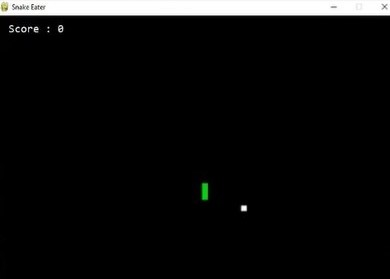

O objetivo é a cobra comer as bolinhas brancas, assim, ela aumenta seu tamanho. A cada bola coletada a pontuação aumenta um ponto.






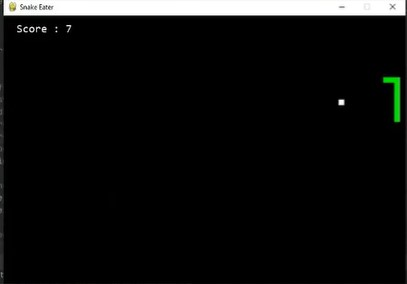

Porém, se a extremidade da cobra encostar na borda da interface ou encostar nela mesma o jogo acaba. Na imagem abaixo, a cobra está se aproximando da borda inferior direita.

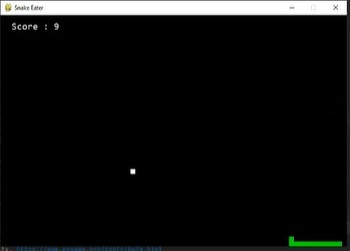

Na figura abaixo é um exemplo de quando parte da cobra encosta nela mesma.

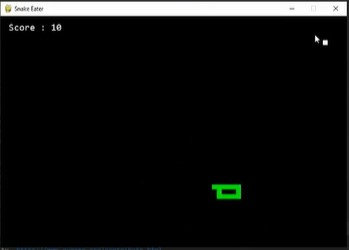

Na tela de quando o jogador perde é indicado a mensagem "YOU DIED", representando a morte da cobra e logo abaixo é indicado a pontuação obtida na partida.

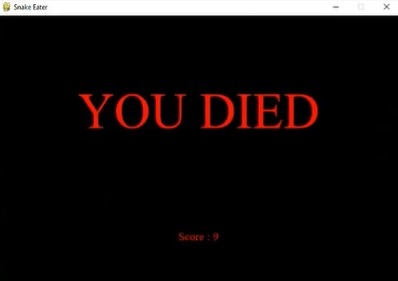

## Conclusões:
Foi possível alcançar os objetivos propostos, que eram explicar o funcionamento do código e mostrar prints da tela de jogo


## Trabalhos Futuros:
Para melhorar o jogo poderia ter uma tela inicial em que o jogador consiga escolher o nível de dificuldade já com o programa em execução.

## Referências utilizadas

https://www.pygame.org/docs/tut/ImportInit.html

https://www.geeksforgeeks.org/how-to-initialize-all-the-imported-modules-in-pygame/

https://www.pygame.org/docs/ref/font.html

https://www.geeksforgeeks.org/sleep-in-python/

https://www.pygame.org/docs/ref/surface.html